1. Download the 'movie_reviews' dataset from NLTK:

In [2]:
from nltk import download
download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

2. Check the movie review categories:

In [3]:
from nltk.corpus import movie_reviews
print("Movie Reviews categories:", movie_reviews.categories())

Movie Reviews categories: ['neg', 'pos']


3. Check the number of reviews each category has:

In [ ]:
print("Number of positive reviews: ", len(movie_reviews.fileids('pos')))
print("Number of negative reviews: ", len(movie_reviews.fileids('neg')))
print("Total reviews: ", len(movie_reviews.fileids()))

Number of positive reviews:  1000
Number of negative reviews:  1000
Total reviews:  2000


4. Know the structure of the first review in each category:

In [ ]:
neg_fileid = movie_reviews.fileids('neg')[0]
print(f"\n--- Raw content of a negative review (ID: {neg_fileid}) ---")
print(movie_reviews.raw(neg_fileid)[:100])
pos_fileid = movie_reviews.fileids('pos')[0]
print(f"\n--- Raw content of a positive review (ID: {pos_fileid}) ---")
print(movie_reviews.raw(pos_fileid)[:100])


--- Raw content of a negative review (ID: neg/cv000_29416.txt) ---
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 


--- Raw content of a positive review (ID: pos/cv000_29590.txt) ---
films adapted from comic books have had plenty of success , whether they're about superheroes ( batm


5. Tokenize the words of the first review in the 'neg' categroy:



In [21]:
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk import download
download(['punkt', 'punkt_tab'])

file_id = movie_reviews.fileids('neg')[0]
review_text = movie_reviews.raw(file_id)
tokens = word_tokenize(review_text)

print("--- FIRST 100 characters OF THE ORIGINAL REVIEW ---")
print(review_text[:100])
print("\n--- FIRST 15 TOKENS OF THE TOKENIZED REVIEW ---")
print(tokens[:15])

--- FIRST 100 characters OF THE ORIGINAL REVIEW ---
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 


--- FIRST 15 TOKENS OF THE TOKENIZED REVIEW ---
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


6. Remove punctuation signs (“!”, “.”, “?”), stopwords (“the”, “a”, “is”, “in”) tokens and most common words for both categories and display the 10 most frequent words by category:

In [18]:
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from collections import Counter
import string
import matplotlib.pyplot as plt
import numpy as np

pos_fileids = movie_reviews.fileids('pos')
neg_fileids = movie_reviews.fileids('neg')

stop_words = set(stopwords.words('english'))

additional_words_to_remove = set([
    "'s", "''", "'nt", "film", "movie", "one", "like", "story", "also", "would", "films",
    "n't", "ca", "'d", "'ll", "'re", "'ve", "``", "...", "--", "—", "–",
    "could", "get", "go", "made", "make", "much", "way", "time", "really", "even",
    "still", "well", "two", "first", "never", "back", "know", "see", "think",
    "something", "someone", "anything", "everything", "nothing", "around", "through"
])

def process_reviews(fileids):
    all_tokens = []
    for fileid in fileids:
        review_text = movie_reviews.raw(fileid)
        tokens = word_tokenize(review_text)
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if word.isalpha() and len(word) > 1]
        tokens = [word for word in tokens if word not in stop_words and word not in additional_words_to_remove]
        all_tokens.extend(tokens)
    return Counter(all_tokens)

pos_word_counts = process_reviews(pos_fileids)
neg_word_counts = process_reviews(neg_fileids)

print("Positive word counts (first 10):", pos_word_counts.most_common(10))
print("Negative word counts (first 10):", neg_word_counts.most_common(10))

Positive word counts (first 10): [('good', 1190), ('character', 1067), ('life', 992), ('characters', 985), ('best', 808), ('people', 788), ('many', 780), ('little', 768), ('great', 743), ('man', 739)]
Negative word counts (first 10): [('good', 1126), ('bad', 1019), ('character', 929), ('plot', 880), ('characters', 873), ('little', 722), ('people', 660), ('scene', 658), ('scenes', 631), ('action', 606)]


7. Calculate the relative word frequency: If we just count word frequencies, we see that "good" appears 1190 times in positive reviews and 1126 times in negative reviews. Instead of raw counts, we should calculate what percentage each word represents of all words in that category.

A positive difference means the word is more characteristic of positive reviews.
A negative difference means the word is more characteristic of negative reviews.

Finally, we will sort and plot all words by their difference scores:
Top positive differences are the most positive words.
Top negative differences , the ones at the bottom of the list, are the most negative words.

plot of the most significant words by category: 


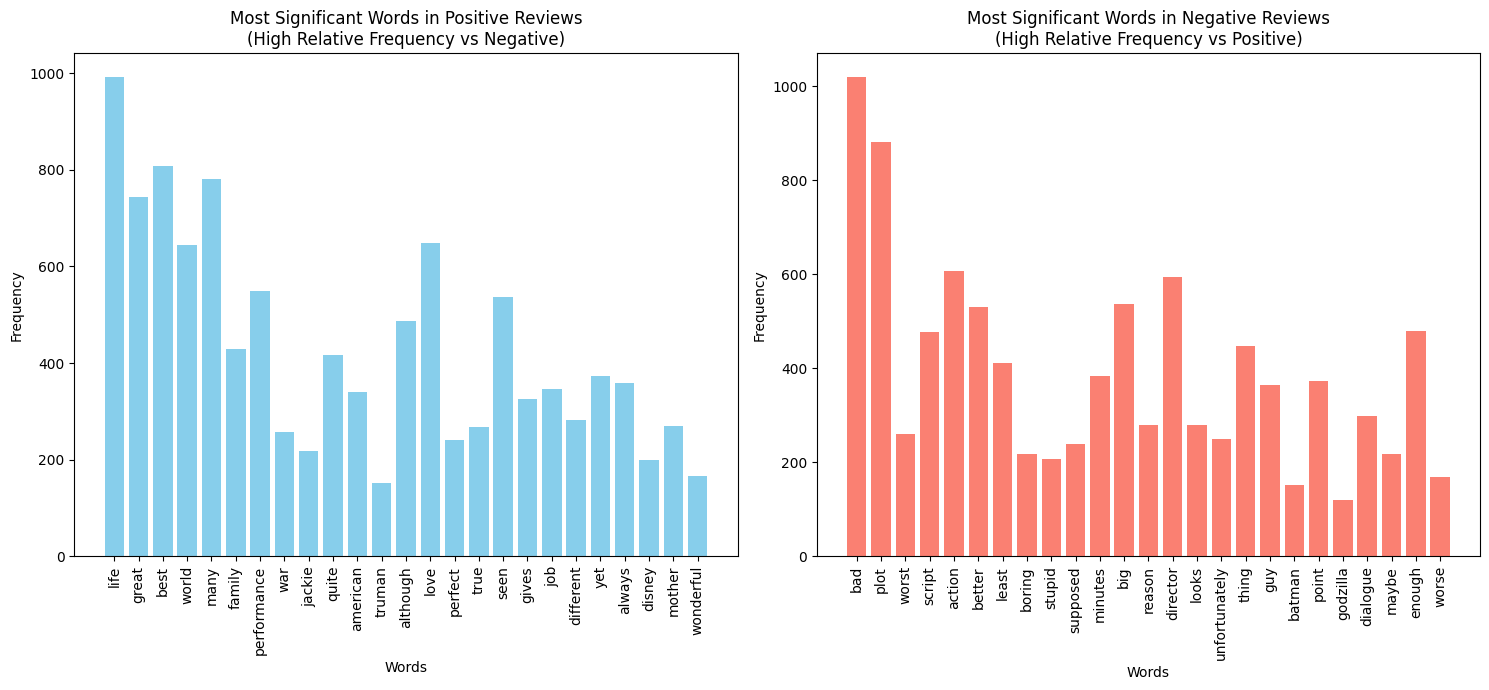

In [23]:
total_pos_words = sum(pos_word_counts.values())
total_neg_words = sum(neg_word_counts.values())

def get_significant_words_by_difference(pos_counts, neg_counts, top_n=25, min_frequency=10):
    all_words = set(pos_counts.keys()) | set(neg_counts.keys())
    all_words = {word for word in all_words if pos_counts[word] + neg_counts[word] >= min_frequency}

    word_differences = {}
    for word in all_words:
        pos_freq = pos_counts[word] / total_pos_words
        neg_freq = neg_counts[word] / total_neg_words
        difference = pos_freq - neg_freq
        word_differences[word] = {
            'difference': difference,
            'pos_freq': pos_freq,
            'neg_freq': neg_freq,
            'pos_count': pos_counts[word],
            'neg_count': neg_counts[word]
        }

    sorted_words = sorted(word_differences.items(), key=lambda x: x[1]['difference'], reverse=True)

    pos_significant = sorted_words[:top_n]
    neg_significant = sorted_words[-top_n:][::-1]

    return pos_significant, neg_significant

print("plot of the most significant words by category: ")
pos_significant, neg_significant = get_significant_words_by_difference(pos_word_counts, neg_word_counts)

words_pos_sig = [word for word, data in pos_significant]
counts_pos_sig = [data['pos_count'] for word, data in pos_significant]

words_neg_sig = [word for word, data in neg_significant]
counts_neg_sig = [data['neg_count'] for word, data in neg_significant]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(words_pos_sig, counts_pos_sig, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Significant Words in Positive Reviews\n(High Relative Frequency vs Negative)")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(words_neg_sig, counts_neg_sig, color='salmon')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Significant Words in Negative Reviews\n(High Relative Frequency vs Positive)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()